### Project 1. Explore Weather Trends

- I used SQL & Python (Pandas and Matplotlib) for this analysis. Average temparature at Berlin, Tokyo and New York will be compared to the global average temparature.


- Below is SQL code to extract temparature of each city from 1845 to 2013

>[Tokyo]<br>
SELECT * <br>
FROM city_data<br>
WHERE city = 'Tokyo'

>[Berlin]<br>
SELECT *<br>
FROM city_data<br>
WHERE city = 'Berlin' AND year > 1844<br>

>[New York]<br>
SELECT *<br>
FROM city_data<br>
WHERE city= 'New York' AND year > 1844<br>

>[Global]<br>
SELECT *<br>
FROM global_data<br>
WHERE year BETWEEN 1845 AND 2013

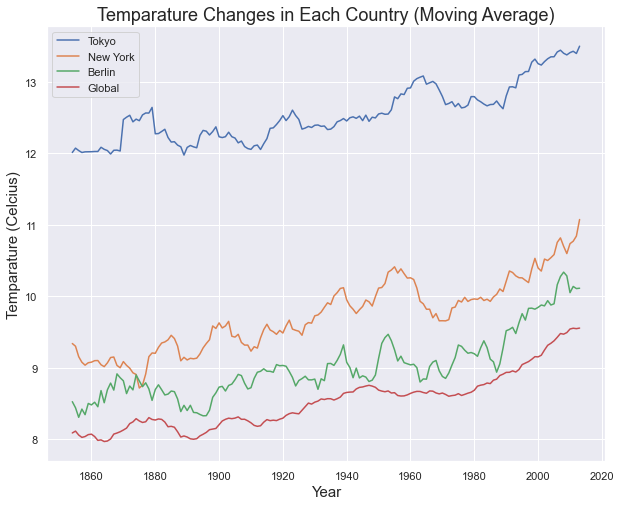

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,8)})
%matplotlib inline


global_df=pd.read_csv('./Global.csv')
global_df['new_avg']=global_df['avg_temp'].rolling(window=10).mean()

tokyo_df=pd.read_csv('./Tokyo.csv')
tokyo_df=tokyo_df[['avg_temp','year']]
tokyo_df['new_avg']=tokyo_df['avg_temp'].rolling(window=10).mean()

be_df=pd.read_csv('./Berlin.csv')
be_df=be_df.fillna(method='pad')
be_df['new_avg']=be_df['avg_temp'].rolling(window=10).mean()
be_df=be_df[['year', 'new_avg']]

ny_df=pd.read_csv('./NewYork.csv')
ny_df=ny_df.fillna(method='pad')
ny_df['new_avg']=ny_df['avg_temp'].rolling(window=10).mean()
ny_df=ny_df[['year', 'new_avg']]


fig, ax = plt.subplots(figsize = (10,8))
ax.plot(tokyo_df['year'].values, tokyo_df['new_avg'])
ax.plot(ny_df['year'].values, ny_df['new_avg'])
ax.plot(be_df['year'].values, be_df['new_avg'])
ax.plot(global_df['year'].values, global_df['new_avg'])
ax.set_xlabel('Year', size = 15)
ax.set_ylabel('Temparature (Celcius)', size = 15)
plt.title('Temparature Changes in Each Country (Moving Average)', size = 18)
ax.legend(['Tokyo', 'New York', 'Berlin', 'Global'])
plt.show();

In [74]:
# Comparison in average temparature between Berlin and New York

ny_small = ny_df.query('year > 1870 & year < 1880')
be_small = be_df.query('year > 1870 & year < 1880')
combine = ny_small.merge(be_small, left_on='year', right_on='year')
combine.rename(columns={"new_avg_x": "NY_Temp", "new_avg_y": "Berlin_Temp"}, inplace = True)
combine = combine.query('NY_Temp < Berlin_Temp')
combine

,year,NY_Temp,Berlin_Temp
4,1875,8.717,8.816


In [85]:
# Which city has the biggest & smallest variance?
import numpy as np

print("Mean variance of Berlin:",np.var(be_df['new_avg']))
print("Mean variance of New York:", np.var(ny_df['new_avg']))
print("Mean variance of Tokyo:", np.var(tokyo_df['new_avg']))
print("Mean variance global:", np.var(global_df['new_avg']))

Mean variance of Berlin: 0.20544298984375006
Mean variance of New York: 0.252252656875
Mean variance of Tokyo: 0.15819421089843755
Mean variance global: 0.15613153402343738


In [86]:
# Average temparature over the past 160+ years

print("Average temparature of Berlin", be_df.new_avg.mean())
print("Average temparature of Tokyo", tokyo_df.new_avg.mean())
print("Average temparature of New York", ny_df.new_avg.mean())
print("Average temparature global", global_df.new_avg.mean())

Average temparature of Berlin 9.0153125
Average temparature of Tokyo 12.55318125
Average temparature of New York 9.729175000000001
Average temparature global 8.52826875


In [76]:
# Which city has the biggest gap between minimum & maximum temparature?

print("Temp. difference in Berlin:", be_df.new_avg.max() - be_df.new_avg.min())
print("Temp. difference in Tokyo:", tokyo_df.new_avg.max() - tokyo_df.new_avg.min())
print("Temp. difference in New York:", ny_df.new_avg.max() - ny_df.new_avg.min())
print("Temp. difference global:", global_df.new_avg.max() - global_df.new_avg.min())

Temp. difference in Berlin: 2.032000000000002
Temp. difference in Tokyo: 1.5240000000000027
Temp. difference in New York: 2.3590000000000018
Temp. difference global: 1.5879999999999983


### Findings:
0. Averate temparature has been continuously increasing in every country since 1845.
1. New York has the biggest gap between the minimum temp and maximum temp (2.359), which is 0.772 degree higher than global average. (1.587) 
2. Tokyo is the warmest city among the countries on the list, with mean temparature of 12.553. This is higher than global average of 8.528. We can observe that the mean temparature in Tokyo dropped at the beginning of 1880s, but has been increasing ever since.
3. New York has the highest mean variance (0.252), which means the average temparature of New York most fluctuated. This is higher than the global mean variance, 0.156.
4. Average temparature of Berlin has been always lower than New York, except in 1875. 